READ BEFORE EXECUTION: At the first execution, please un-comment the first cell by removing the # symbol and then execute it totally. This is to install the chainladder module. Before further executions, please comment the first cell by adding the # symbol before the ! symbol

In [ ]:
!#pip install chainladder

     |████████████████████████████████| 1.3 MB 7.6 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import chainladder as cl
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

# **Development Triangle**

In [ ]:
#Loading the raa sample 
dev_triangle=cl.load_sample('ukmotor')
dev_triangle

,12,24,36,48,60,72,84
2007,"3,511","6,726","8,992","10,704","11,763","12,350","12,690"
2008,"4,001","7,703","9,981","11,161","12,117","12,746",
2009,"4,355","8,287","10,233","11,755","12,993",,
2010,"4,295","7,750","9,773","11,093",,,
2011,"4,150","7,897","10,217",,,,
2012,"5,102","9,650",,,,,
2013,"6,283",,,,,,


In [ ]:
#Using the link_ratio as loss development factor
dev_triangle.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84
2007,1.9157,1.3369,1.1904,1.0989,1.0499,1.0275
2008,1.9253,1.2957,1.1182,1.0857,1.0519,
2009,1.9029,1.2348,1.1487,1.1053,,
2010,1.8044,1.2610,1.1351,,,
2011,1.9029,1.2938,,,,
2012,1.8914,,,,,


In [ ]:
#latest_paid is taken as latest_diagnol so 
latest_paid = dev_triangle.latest_diagonal
latest_paid

,2013
2007,"12,690"
2008,"12,746"
2009,"12,993"
2010,"11,093"
2011,"10,217"
2012,"9,650"
2013,"6,283"


In [ ]:
print("Is the triangle cummulative?:",dev_triangle.is_cumulative)
print("Does the triangle contain ultimate projections?:",dev_triangle.is_ultimate)
print("Is this a valuation triangle?:",dev_triangle.is_val_tri)
print("Has the triangle been squared?:",dev_triangle.is_full)

Is the triangle cummulative?: True
Does the triangle contain ultimate projections?: False
Is this a valuation triangle?: False
Has the triangle been squared?: False


In [ ]:
#Using inc_to_cum and cum_to_incr to change the view of development triangle from incremental to development to viceversa 
dev_triangle_inc = dev_triangle.cum_to_incr()
dev_triangle_inc

,12,24,36,48,60,72,84
2007,"3,511","3,215","2,266","1,712","1,059",587,340
2008,"4,001","3,702","2,278","1,180",956,629,
2009,"4,355","3,932","1,946","1,522","1,238",,
2010,"4,295","3,455","2,023","1,320",,,
2011,"4,150","3,747","2,320",,,,
2012,"5,102","4,548",,,,,
2013,"6,283",,,,,,


In [ ]:
#If the triangle is already cumulative then the output we will try to change it will not change
dev_triangle_cum = dev_triangle.incr_to_cum()
dev_triangle_cum 

,12,24,36,48,60,72,84
2007,"3,511","6,726","8,992","10,704","11,763","12,350","12,690"
2008,"4,001","7,703","9,981","11,161","12,117","12,746",
2009,"4,355","8,287","10,233","11,755","12,993",,
2010,"4,295","7,750","9,773","11,093",,,
2011,"4,150","7,897","10,217",,,,
2012,"5,102","9,650",,,,,
2013,"6,283",,,,,,


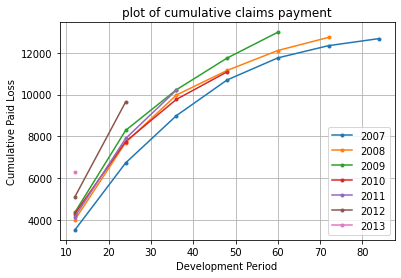

In [ ]:
#This plot explains the changes in the cummulative paid loss with respect to the development period. 
dev_triangle.T.plot(
    marker='.', grid=True,
    title='plot of cumulative claims payment').set(
    xlabel='Development Period', ylabel='Cumulative Paid Loss');

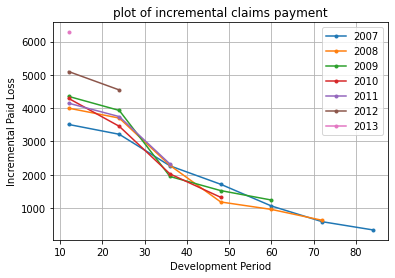

In [ ]:
#This plot explains the changes in the incremental paid loss with respect to the development period. 
dev_triangle_inc.T.plot(
    marker='.', grid=True,
    title='plot of incremental claims payment').set(
    xlabel='Development Period', ylabel='Incremental Paid Loss');

In [ ]:
dev_triangle.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84
2007,1.9157,1.3369,1.1904,1.0989,1.0499,1.0275
2008,1.9253,1.2957,1.1182,1.0857,1.0519,
2009,1.9029,1.2348,1.1487,1.1053,,
2010,1.8044,1.2610,1.1351,,,
2011,1.9029,1.2938,,,,
2012,1.8914,,,,,


In [ ]:
dev_triangle.link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84
2007,1.9157,1.3369,1.1904,1.0989,1.0499,1.0275
2008,1.9253,1.2957,1.1182,1.0857,1.0519,
2009,1.9029,1.2348,1.1487,1.1053,,
2010,1.8044,1.2610,1.1351,,,
2011,1.9029,1.2938,,,,
2012,1.8914,,,,,


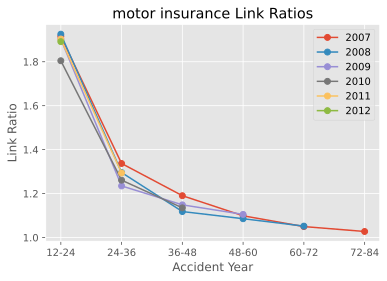

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
# Plot
ax = dev_triangle.link_ratio.T.plot(
    marker='o', 
    title='uk motor insurance chainladder  Ratios',
    ylabel='Link Ratio', xlabel='Accident Year');

# **Deterministic Methods**

## **Chain Ladder Method**

In [ ]:
#Checking whether the development triangle is cummmulative or not
dev_triangle.is_cumulative

True

In [ ]:
#Fitting the development triangle into the chain ladder fit method
modeltriangle = cl.Chainladder().fit(dev_triangle)
modeltriangle

Chainladder()

In [ ]:
modeltriangle.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108
(All),1.8892,1.2824,1.1471,1.0968,1.0509,1.0275,1.0000,1.0000


In [ ]:
#Obtaining the IBNR(Incurred But Not Reported) Values 
ibnr_values = (modeltriangle.full_triangle_.cum_to_incr()- dev_triangle.cum_to_incr())
ibnr_values

,12,24,36,48,60,72,84,96,9999
2007,,,,,,,,,
2008,,,,,,,351,,
2009,,,,,,662,376,,
2010,,,,,"1,073",620,352,,
2011,,,,"1,503","1,134",655,372,,
2012,,,"2,725","1,820","1,374",793,450,,
2013,,"5,587","3,352","2,239","1,690",975,554,,


In [ ]:
modeltriangle.ibnr_

,2261
2007,
2008,351
2009,"1,038"
2010,"2,045"
2011,"3,663"
2012,"7,162"
2013,"14,397"


In [ ]:
modeltriangle.ultimate_

,2261
2007,"12,690"
2008,"13,097"
2009,"14,031"
2010,"13,138"
2011,"13,880"
2012,"16,812"
2013,"20,680"


In [ ]:
#cumulative estimated full triangle
full_triangle = modeltriangle.full_triangle_
full_triangle

,12,24,36,48,60,72,84,96,9999
2007,"3,511","6,726","8,992","10,704","11,763","12,350","12,690","12,690","12,690"
2008,"4,001","7,703","9,981","11,161","12,117","12,746","13,097","13,097","13,097"
2009,"4,355","8,287","10,233","11,755","12,993","13,655","14,031","14,031","14,031"
2010,"4,295","7,750","9,773","11,093","12,166","12,786","13,138","13,138","13,138"
2011,"4,150","7,897","10,217","11,720","12,854","13,509","13,880","13,880","13,880"
2012,"5,102","9,650","12,375","14,195","15,569","16,362","16,812","16,812","16,812"
2013,"6,283","11,870","15,222","17,461","19,151","20,126","20,680","20,680","20,680"


In [ ]:
#incremental estimated full triangle
full_triangle.cum_to_incr()

,12,24,36,48,60,72,84,96,9999
2007,"3,511","3,215","2,266","1,712","1,059",587,340,,
2008,"4,001","3,702","2,278","1,180",956,629,351,,
2009,"4,355","3,932","1,946","1,522","1,238",662,376,,
2010,"4,295","3,455","2,023","1,320","1,073",620,352,,
2011,"4,150","3,747","2,320","1,503","1,134",655,372,,
2012,"5,102","4,548","2,725","1,820","1,374",793,450,,
2013,"6,283","5,587","3,352","2,239","1,690",975,554,,


In [ ]:
#The Ultimate Loss can be calculated as the reverse diagonal or the alternate diagonal of the full triangle
ultimate_loss= full_triangle.latest_diagonal

In [ ]:
#Taking ultimate loss on all years
print("total sum of ultimate loss is")
ultimate_sum= ultimate_loss.sum()
print(ultimate_sum)

total sum of ultimate loss is
104327.7729324564


In [ ]:
#Sum total of paid loss
print("sum total of paid loss:")
paid_sum = latest_paid.sum()
print(paid_sum)

sum total of paid loss:
75672.0


In [ ]:
#Sum of total of IBNR loss
print("outstanding or ibnr total loss is")
ibnr_sum = ultimate_sum-paid_sum
print(ibnr_sum)

outstanding or ibnr total loss is
28655.7729324564


### **Tail Factors**

In [ ]:
#Predicting the tail factors which are the loss development factors beyond the current development period.
tail = cl.TailCurve().fit(dev_triangle)
print("cumulative development factors")
print(tail.cdf_)
print("Loss development factors")
print(tail.ldf_)
print("Tail estimates of next two years")
tail.cdf_[~tail.ldf_.development.isin(dev_triangle.link_ratio.development)]

cumulative development factors
         12-Ult    24-Ult    36-Ult    48-Ult    60-Ult   72-Ult    84-Ult    96-Ult
(All)  3.382666  1.790496  1.396227  1.217175  1.109794  1.05602  1.027726  1.014334
Loss development factors
          12-24     24-36     36-48     48-60     60-72    72-84     84-96    96-108
(All)  1.889234  1.282381  1.147105  1.096758  1.050921  1.02753  1.013203  1.014334
Tail estimates of next two years


,84-Ult,96-Ult
(All),1.0277,1.0143


# **Stochastic Methods**

## **Mack Model**

In [ ]:
#Loading the dataset RAA and constructing the Mack Chainladder model.
data = cl.load_sample('ukmotor')
mack = cl.MackChainladder()
dev=cl.Development(average='volume')
mack.fit(dev.fit_transform(data))

MackChainladder()

In [ ]:
#The Mack Chainladder model can be summarized as follows:
mack.summary_

,Latest,IBNR,Ultimate,Mack Std Err
2007,"12,690",,"12,690",
2008,"12,746",351,"13,097",27
2009,"12,993","1,038","14,031",37
2010,"11,093","2,045","13,138",145
2011,"10,217","3,663","13,880",428
2012,"9,650","7,162","16,812",693
2013,"6,283","14,397","20,680",901


/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


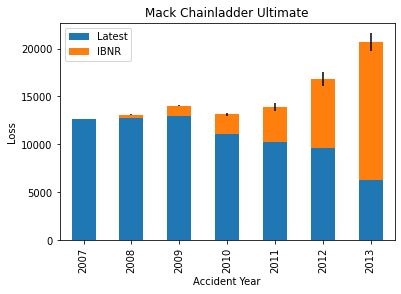

In [ ]:
#Plotting the summary of the Mack Model
plot_data = mack.summary_.to_frame()
g = plot_data[['Latest', 'IBNR']] \
    .plot(kind='bar', stacked=True,
          yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                             'IBNR': plot_data['Mack Std Err']}),
          ylim=(0, None), title='Mack Chainladder Ultimate')
g.set_xlabel('Accident Year')
g.set_ylabel('Loss');

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


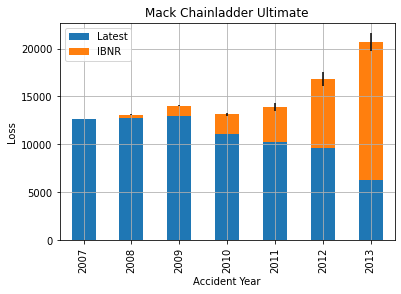

In [ ]:
#Plotting the results of the Mack Chainladder
plot_data = mack.summary_.to_frame()
g = plot_data[['Latest', 'IBNR']].plot(
    kind='bar', stacked=True, ylim=(0, None), grid=True,
    yerr=pd.DataFrame({'latest': plot_data['Mack Std Err']*0,
                       'IBNR': plot_data['Mack Std Err']}),
    title='Mack Chainladder Ultimate').set(
    xlabel='Accident Year', ylabel='Loss');

In [ ]:
#Obtaining the risk parameters
mack.parameter_risk_

,12,24,36,48,60,72,84,9999
2007,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008,0.00,0.00,0.00,0.00,0.00,0.00,19.42,19.42
2009,0.00,0.00,0.00,0.00,0.00,13.05,24.75,24.75
2010,0.00,0.00,0.00,0.00,64.70,69.09,73.61,73.61
2011,0.00,0.00,0.00,154.14,182.36,192.08,198.43,198.43
2012,0.00,0.00,164.64,265.56,302.80,318.60,328.32,328.32
2013,0.00,111.69,248.04,365.65,413.76,435.25,448.29,448.29


In [ ]:
#Finding out reserve variability of mack
mack.mack_std_err_[mack.mack_std_err_.development==mack.mack_std_err_.development.max()]

,9999
2007,
2008,27.25
2009,36.52
2010,144.53
2011,427.63
2012,693.17
2013,901.41


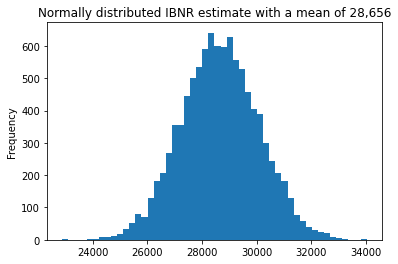

In [ ]:
#The IBNR estimate follows a normal distribution
dist = pd.Series(np.random.normal(mack.ibnr_.sum(),
                           mack.total_mack_std_err_.values[0, 0], size=10000))
dist.plot(
    kind='hist', bins=50,
    title="Normally distributed IBNR estimate with a mean of " + '{:,}'.format(round(mack.ibnr_.sum(),0))[:-2]);

# **Poisson Regression Model**
## **Difference Between Poisson Regression Model and Traditional Model**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


12-24    1.889234
24-36    1.282381
36-48    1.147105
48-60    1.096758
60-72    1.050921
72-84    1.027530
Name: Traditional, dtype: float64

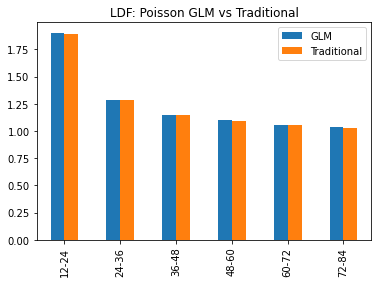

In [ ]:
#Creating a Poisson Regression Model first using the TweedieGLM function and then comparing it with a traditional model
genins= cl.load_sample('ukmotor')
dev = cl.TweedieGLM(
    design_matrix = 'C(development) + C(origin)',
    link = 'log', power = 1).fit(genins)
glm = dev.ldf_.iloc[..., 0, :].T.iloc[:,0].rename('GLM')
traditional = cl.Development().fit(genins).ldf_.T.iloc[:, 0].rename('Traditional')
pd.concat((glm,traditional), 1).plot(kind='bar', title='LDF: Poisson GLM vs Traditional');
glm
traditional

# **Over Disperssed Poisson Bootstrap Model**

In [ ]:
#Loading 2 sample sets of RAA and Genins and creating their respect ODP Bootstrap Model
raa_triangle = cl.load_sample('ukmotor')
genins_triangle = cl.load_sample('ukmotor')
raa_insur = cl.BootstrapODPSample().fit_transform(raa_triangle)
sims_insur = cl.BootstrapODPSample().fit_transform(genins_triangle)
raa_insur_ldf = cl.Development().fit(raa_insur).ldf_
sims_insur_ldf = cl.Development().fit(sims_insur).ldf_
raa_insur
sims_insur
raa_insur_ldf
sims_insur_ldf

,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(1000, 1, 1, 6)"
Index:,[Total]
Columns:,[values]


/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:365: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


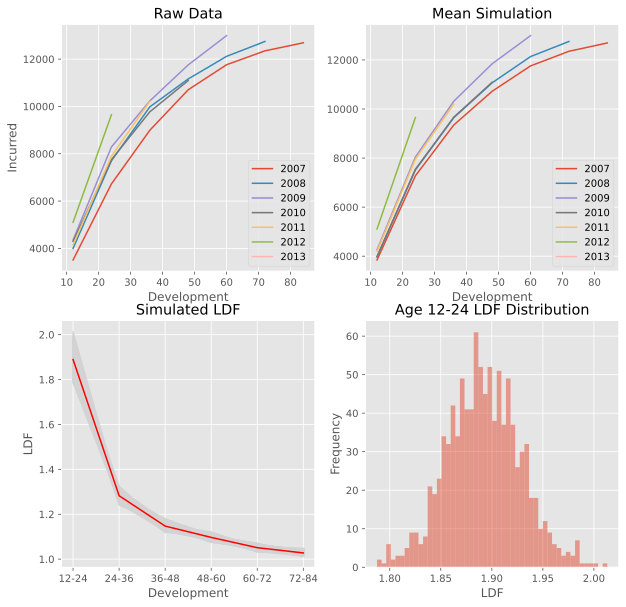

In [ ]:
#Plot for the genins data set
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
# Plot 1
genins_triangle.T.plot(ax=ax00, grid=True).set(title='Raw Data', xlabel='Development', ylabel='Incurred')
# Plot 2
sims_insur.mean().T.plot(ax=ax01, grid=True).set(title='Mean Simulation', xlabel='Development')
# Plot 3
sims_insur_ldf.T.plot(legend=False, color='lightgray', ax=ax10, grid=True).set(
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
cl.Development().fit(genins_triangle).ldf_.drop_duplicates().T.plot(
    legend=False, color='red', ax=ax10, grid=True)
# Plot 4
sims_insur_ldf.T.loc['12-24'].plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11 , grid=True).set(
    title='Age 12-24 LDF Distribution', xlabel='LDF');

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:365: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)
/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


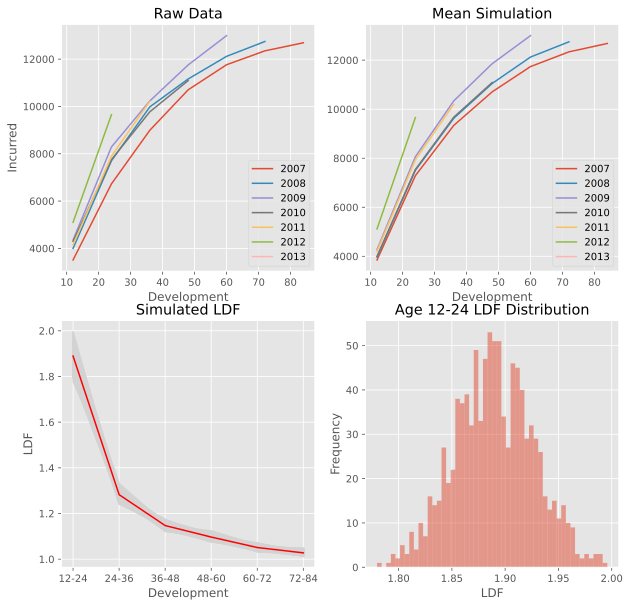

In [ ]:
#Plot for the RAA data set
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
# Plot 1
raa_triangle.T.plot(ax=ax00, grid=True).set(title='Raw Data', xlabel='Development', ylabel='Incurred')
# Plot 2
raa_insur.mean().T.plot(ax=ax01, grid=True).set(title='Mean Simulation', xlabel='Development')
# Plot 3
raa_insur_ldf.T.plot(legend=False, color='lightgray', ax=ax10, grid=True).set(
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
cl.Development().fit(raa_triangle).ldf_.drop_duplicates().T.plot(
    legend=False, color='red', ax=ax10, grid=True)
# Plot 4
raa_insur_ldf.T.loc['12-24'].plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11 , grid=True).set(
    title='Age 12-24 LDF Distribution', xlabel='LDF');

## **ODP Bootstrap Model Comparrision With Other Models**

In [ ]:
#Loading the RAA data set
triangle = cl.load_sample('ukmotor')

In [ ]:
#Creating an ODP Bootstrap Model 
s1 = cl.BootstrapODPSample(
    n_sims=5000, random_state=42).fit(triangle).resampled_triangles_
s1

,Triangle Summary
Valuation:,2013-12
Grain:,OYDY
Shape:,"(5000, 1, 7, 7)"
Index:,[Total]
Columns:,[values]


In [ ]:
s2 = cl.BootstrapODPSample(
    drop_high=True, drop_low=True,
    n_sims=5000, random_state=42).fit_transform(triangle)
s2

/usr/local/lib/python3.7/dist-packages/chainladder/development/base.py:144: UserWarning: Some exclusions have been ignored. At least 1 (use preserve = ...) link ratio(s) is required for development estimation.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/chainladder/adjustments/bootstrap.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  deg_free_adj_fctr = xp.sqrt(n_obs / deg_free)


,Triangle Summary
Valuation:,2013-12
Grain:,OYDY
Shape:,"(5000, 1, 7, 7)"
Index:,[Total]
Columns:,[values]


In [ ]:
results = cl.Chainladder().fit(s1).ibnr_.sum('origin').rename('columns', ['Original'])
# Add another column to triangle with second set of results.
results['Dropped'] = cl.Chainladder().fit(s2).ibnr_.sum('origin')

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


[Text(0.5, 0, 'Ultimate')]

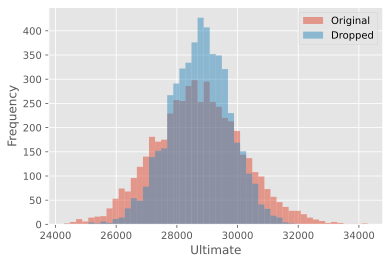

In [ ]:
results.to_frame().plot(kind='hist', bins=50, alpha=0.5, grid=True).set(
    xlabel='Ultimate')

In [ ]:
tri_first_lags = triangle[triangle.development<=24][triangle.origin<='2012']

In [ ]:
tri_first_lags

,12,24
2007,"3,511","6,726"
2008,"4,001","7,703"
2009,"4,355","8,287"
2010,"4,295","7,750"
2011,"4,150","7,897"
2012,"5,102","9,650"


## **Chain Ladder in Linear Regression Format**

In [ ]:
#Splitting the data into X and Y and then creating a Linear Regression Model.
y = tri_first_lags .to_frame().values[:, 1]
X = tri_first_lags .to_frame().values[:, 0]

model = sm.WLS(y, X, weights=(1/X)**2)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.121e+04
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    1.42e-09
Time:                        09:25:02   Log-Likelihood:                         -39.258
No. Observations:                   6   AIC:                                      80.52
Df Residuals:                       5   BIC:                                      80.31
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8904      0.018    105.899      0.000       1.845       1.936
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.104
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.390
Skew:                          -1.504   Prob(JB):                        0.303
Kurtosis:                       3.718   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y

array([ 8269.,  4285.,  8992., 11555.,  9565.,  6445.,  4020.,  6947.,
        5395.])

In [ ]:
#Link Ratio
tri_first_lags.link_ratio.to_frame().mean().values[0]

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


8.206099279541355

In [ ]:
dev = cl.Development(average='simple').fit(triangle)
dev

Development(average='simple')

In [ ]:
#Standard Error
dev.std_err_

,12-24,24-36,36-48,48-60,60-72,72-84
(All),0.0179,0.0173,0.0154,0.0058,0.0010,0.0013


In [ ]:
#Sigma Values
dev.sigma_

,12-24,24-36,36-48,48-60,60-72,72-84
(All),0.0437,0.0387,0.0308,0.0100,0.0014,0.0013


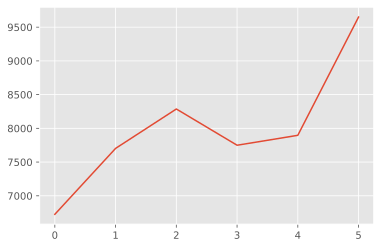

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)

# **Using Deterministic Methods with Bootstrap Samples(Bootstrap Chainladder)**

In [ ]:
#Taking new samples because bootstrap samples imposes less data constraints than mack data samples
samples = cl.BootstrapODPSample(n_sims=10000).fit(triangle).resampled_triangles_
samples = cl.BootstrapODPSample(n_sims=10000).fit_transform(triangle)

In [ ]:
difference = round(1 - cl.Chainladder().fit(samples).ibnr_.sum('origin').mean() / \
                       cl.Chainladder().fit(triangle).ibnr_.sum())
print("Percentage difference in estimate using original triangle and BootstrapODPSample is " +str(difference))

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:163: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:173: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:127: RuntimeWarning:

Percentage difference in estimate using original triangle and BootstrapODPSample is 0


In [ ]:
samples

,Triangle Summary
Valuation:,1990-12
Grain:,OYDY
Shape:,"(10000, 1, 10, 10)"
Index:,[Total]
Columns:,[values]


In [ ]:
pipe = cl.Pipeline([
    ('dev', cl.Development(average='simple')),
    ('tail', cl.TailConstant(1.05))])
pipe.fit(samples)

/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)


Pipeline(steps=[('dev', Development(average='simple')),
                ('tail', TailConstant(tail=1.05))])

In [ ]:
pipe.named_steps.dev.cdf_

,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(10000, 1, 1, 9)"
Index:,[Total]
Columns:,[values]


12-24 LDF of original Triangle: 8.2061


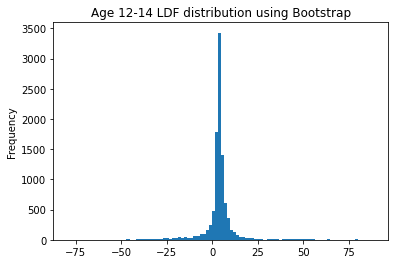

In [ ]:
orig_dev = cl.Development(average='simple').fit(triangle)
resampled_ldf = pipe.named_steps.dev.ldf_
print("12-24 LDF of original Triangle: " + str(round(orig_dev.ldf_.values[0,0,0,0],4)))
pd.Series(resampled_ldf.values[:, 0, 0, 0]).plot(
    kind='hist', bins=100,
    title='Age 12-14 LDF distribution using Bootstrap')

# **Comparrision Between Bootstrap And Mack Model**

/usr/local/lib/python3.7/dist-packages/chainladder/core/pandas.py:57: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


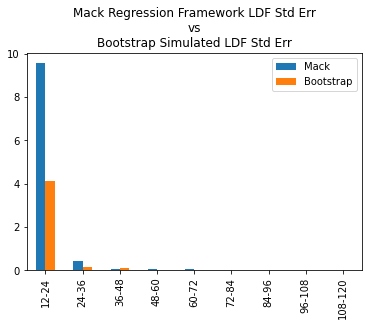

In [ ]:
mack_vs_bs = resampled_ldf.std('index').to_frame().append(
    orig_dev.std_err_.to_frame()).T
mack_vs_bs.columns = ['Mack', 'Bootstrap']
mack_vs_bs.plot(kind='bar', title='Mack Regression Framework LDF Std Err\nvs\nBootstrap Simulated LDF Std Err')

In [ ]:
ibnr = cl.Chainladder().fit(samples).ibnr_.sum('origin')
ibnr_99 = ibnr.quantile(q=0.99)
print("99%-ile of reserve estimate is " +'{:0,}'.format(round(ibnr_99,0)))

/usr/local/lib/python3.7/dist-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:163: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.7/dist-packages/chainladder/development/development.py:173: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1/num_to_nan(w))*(self.sigma_**2).values)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.7/dist-packages/chainladder/tails/base.py:127: RuntimeWarning:

99%-ile of reserve estimate is 105,526.0


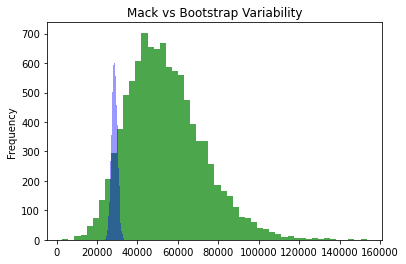

In [ ]:
ax = ibnr.plot(kind='hist', bins=50, alpha=0.7, color='green').plot()
dist.plot(kind='hist', bins=50, alpha=0.4, color='blue', title='Mack vs Bootstrap Variability');

# **Multivariate Chainladder**

In [ ]:
clrd = cl.load_sample("clrd").groupby("LOB").sum()["CumPaidLoss"]
print("Fitting to " + str(len(clrd.index)) + " industries simultaneously.")
cl.Development().fit_transform(clrd).cdf_

Fitting to 6 industries simultaneously.


,Triangle Summary
Valuation:,2261-12
Grain:,OYDY
Shape:,"(6, 1, 1, 9)"
Index:,[LOB]
Columns:,[CumPaidLoss]


In [ ]:
print(cl.Development(average="simple").fit(clrd.loc["wkcomp"]))
print(cl.Development(n_periods=4).fit(clrd.loc["ppauto"]))
print(cl.Development(average="regression", n_periods=6).fit(clrd.loc["comauto"]))

Development(average='simple')
Development(n_periods=4)
Development(average='regression', n_periods=6)
